## Projekt dotyczy analizy katastrof morskich na podstawie Titanicka

Projekt oparty jest na danych dostępnych na stronie <a href="https://www.kaggle.com">Kaggle</a>. Na podstawie danych uczących został wytrenowany model tak aby odpowaidał on przypisanym im etykietom. Algorytm ten wykorzystuje model drzewa decyzyjnego i na podstawie nowych danych może on przewidzeć wartości etykiet.

Pierwszym krokiem jest zaimportowanie potrzebnych bibliotek na potrzeby tego projektu.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

Kolejnym krokiem jest zaimportowanie danych.

In [2]:
train_dataset = pd.read_csv("./train.csv")
test_dataset = pd.read_csv("./test.csv")
test_real_value = pd.read_csv("./gender_submission.csv")

Jednym z ważniejszych elementów jakie należy zrobić jest analiza danych w celu ich zrozumienia.

In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_real_value.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
print("Amount of records data train: " + str(len(train_dataset)))
print("Amount of records test train: " + str(len(test_dataset)))
print("Amount of records test real values train: " + str(len(test_real_value)))

Amount of records data train: 891
Amount of records test train: 418
Amount of records test real values train: 418


In [7]:
train_dataset.info()
print("-"*45)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

Przygotowanie i czyszczenie danych, aby mogły posłużyć do analizy.

In [8]:
# Change values for attribute "Sex" from string to integer in trainig/test set
# "Sex" : male = 0, female = 1
train_dataset['Sex'] = train_dataset['Sex'].apply(lambda change: 1 if change == "female" else 0)
test_dataset['Sex'] = test_dataset['Sex'].apply(lambda change: 1 if change == "female" else 0)

In [9]:
# Prepare "Age" attribute, if "Age" is NaN set mean value
train_dataset["Age"].fillna(value = train_dataset["Age"].mean(), inplace=True)
test_dataset["Age"].fillna(value = test_dataset["Age"].mean(), inplace=True)

In [10]:
#  Change values for attribute "Embarked" from character to integer in trainig/test set if "Embarked" is NaN set it ffillna
# "Embarked" : S - 0, Q - 1, C- 2
train_dataset["Embarked"].fillna(method="ffill", inplace=True)

train_dataset["Embarked"] = train_dataset["Embarked"].apply(lambda change : 0 if change == "S" else  1 if change == "Q" else 2)
test_dataset["Embarked"] = test_dataset["Embarked"].apply(lambda change : 0 if change == "S" else  1 if change == "Q" else 2)

In [11]:
train_dataset.info()
print("-"*45)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [12]:
# Check out basic informations to the train data
train_dataset.describe().apply(lambda x: round(x,2))

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,0.35,29.70,0.52,0.38,32.20,0.47
std,257.35,0.49,0.84,0.48,13.00,1.10,0.81,49.69,0.79
min,1.00,0.00,1.00,0.00,0.42,0.00,0.00,0.00,0.00
25%,223.50,0.00,2.00,0.00,22.00,0.00,0.00,7.91,0.00
50%,446.00,0.00,3.00,0.00,29.70,0.00,0.00,14.45,0.00
75%,668.50,1.00,3.00,1.00,35.00,1.00,0.00,31.00,1.00
max,891.00,1.00,3.00,1.00,80.00,8.00,6.00,512.33,2.00


In [13]:
train_dataset.describe(include="object")

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Ling, Mr. Lee",CA. 2343,B96 B98
freq,1,7,4


In [14]:
# Check out basic informations to the test data
test_dataset.describe().apply(lambda x: round(x,2))

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.00,418.00,418.00,418.00,418.00,418.00,417.00,418.00
mean,1100.50,2.27,0.36,30.27,0.45,0.39,35.63,0.60
std,120.81,0.84,0.48,12.63,0.90,0.98,55.91,0.85
min,892.00,1.00,0.00,0.17,0.00,0.00,0.00,0.00
25%,996.25,1.00,0.00,23.00,0.00,0.00,7.90,0.00
50%,1100.50,3.00,0.00,30.27,0.00,0.00,14.45,0.00
75%,1204.75,3.00,1.00,35.75,1.00,0.00,31.50,1.00
max,1309.00,3.00,1.00,76.00,8.00,9.00,512.33,2.00


In [15]:
test_dataset.describe(include="object")

,Name,Ticket,Cabin
count,418,418,91
unique,418,363,76
top,"Cor, Mr. Ivan",PC 17608,B57 B59 B63 B66
freq,1,5,3


Przygotowanie danych uczących i zmiennej celu.

In [16]:
# Dispaly a few records for train data
X_train = train_dataset.loc[:,["Pclass","Age","Embarked", "Sex"]]
X_train.head()

,Pclass,Age,Embarked,Sex
0,3,22.0,0,0
1,1,38.0,2,1
2,3,26.0,0,1
3,1,35.0,0,1
4,3,35.0,0,0


In [17]:
# Display a few records for test data
y_train = train_dataset.loc[:,["Survived"]]
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [18]:
X_test = test_dataset.loc[:,["Pclass","Age","Embarked", "Sex"]]
X_test.head()

,Pclass,Age,Embarked,Sex
0,3,34.5,1,0
1,3,47.0,0,1
2,2,62.0,1,0
3,3,27.0,0,0
4,3,22.0,0,1


In [19]:
y_test = test_real_value.loc[:,["Survived"]]
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


Utworzenie obiektu drzewa decyzyjnego.

In [20]:
main_tree = DecisionTreeClassifier(max_depth=3, random_state=0, min_samples_leaf=5)

In [21]:
main_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [22]:
print("Score: " + str(round(main_tree.score(X_test, y_test),3)*100)+ "%")

Score: 89.7%


In [23]:
y_pred = main_tree.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.8971291866028708

In [25]:
confusion_matrix(y_test,y_pred)

array([[264,   2],
       [ 41, 111]], dtype=int64)

Utworzenie wykres drzewa decyzyjnego.

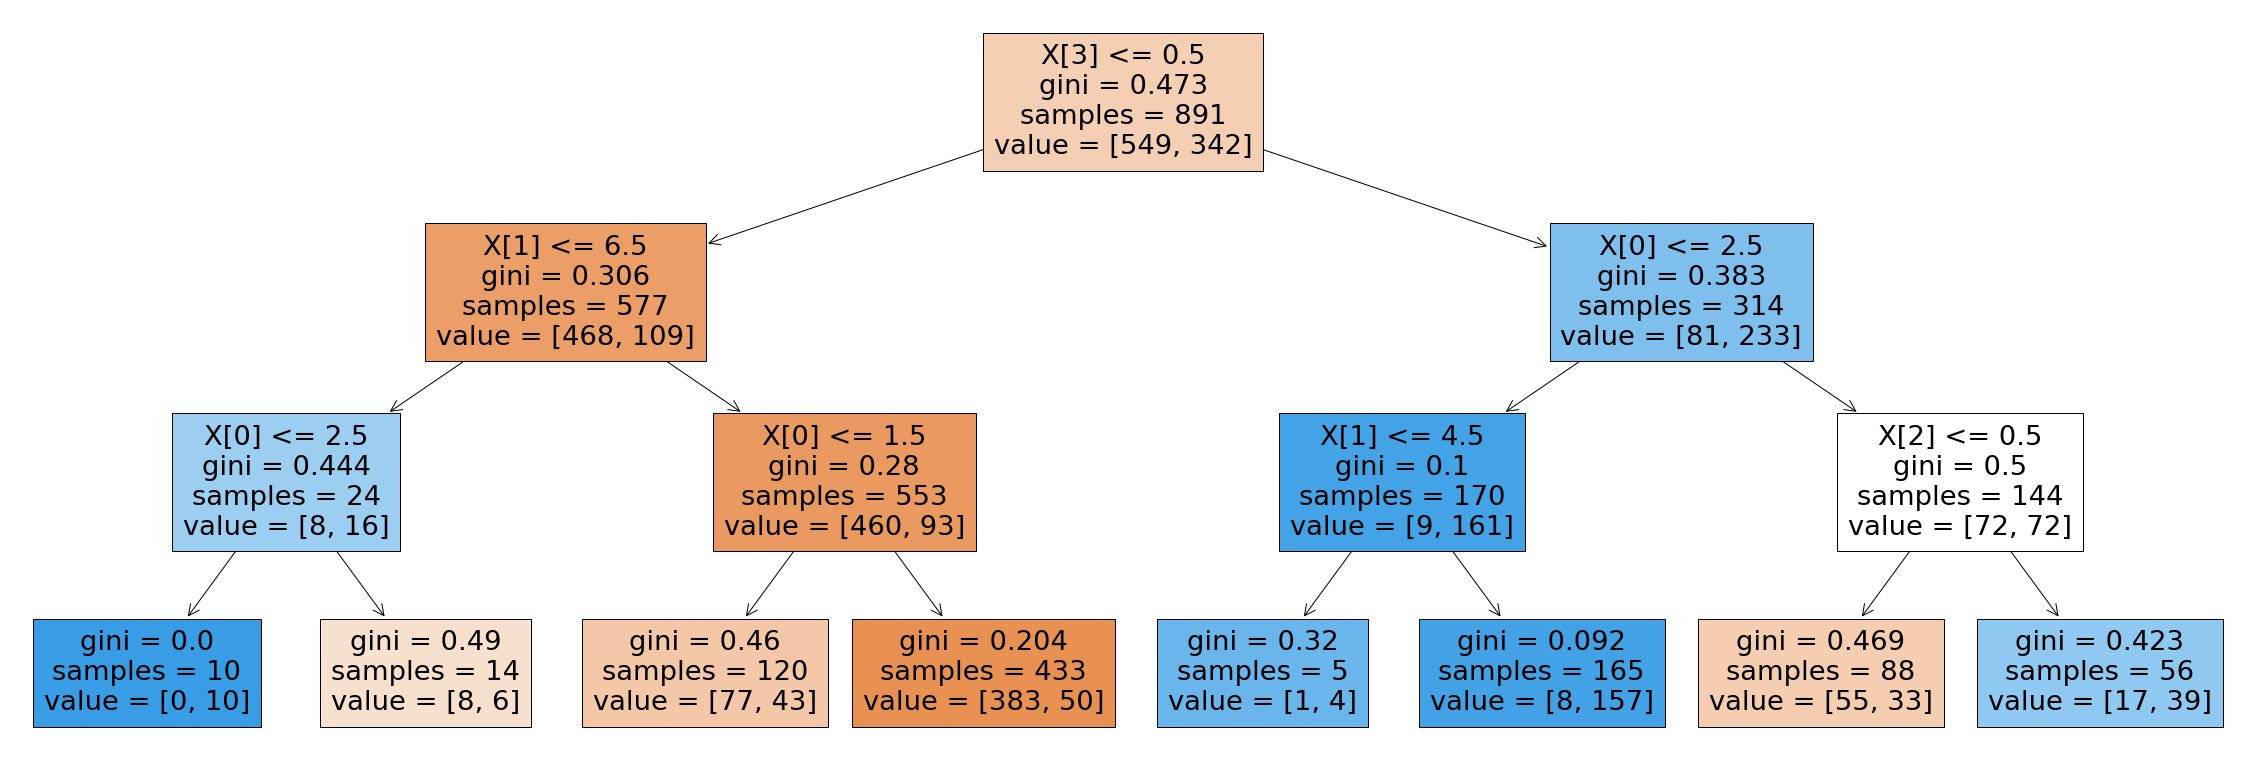

In [26]:
plt.subplots(figsize=(40,14))
plot_tree(main_tree, filled=True)
plt.show()